# Playing around

In [23]:
import numpy as np
import pandas as pd
from scipy import linalg
import sklearn
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import load_boston

In [7]:
boston = load_boston()

In [9]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [12]:
bos = pd.DataFrame(boston['data'], columns=boston['feature_names'])
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


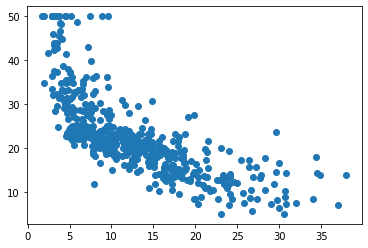

In [46]:
plt.scatter(bos['LSTAT'], bos['PRICE'])

From this we see that the slope should be negative and the intercept should be probably between 30 and 40.

In [48]:
# rename stuff to make things clearer
x = bos.LSTAT
y = bos.PRICE

Now we need to transform the data s.t. $y = mx + c = Ap$. $A$ is `[[x 1]]` and $p$ is `[[m], [c]]`.

I guess $A$ is our values for $x_i$ and $p$ is the list of coefficients. I assume that if we had multiple variables, $A$ would be a 3 by $n$ matrix, where the second column would be the data from the second variable. Unclear to me why the coefficients are referred to as singleton arrays here.

In [49]:
# vstack performs a verticle stack, T transposes it.
A = np.vstack([x, np.ones(len(x))]).T
A

array([[4.98, 1.  ],
       [9.14, 1.  ],
       [4.03, 1.  ],
       ...,
       [5.64, 1.  ],
       [6.48, 1.  ],
       [7.88, 1.  ]])

In [50]:
#Maybe another way to do it:
A2 = np.stack([x, np.ones(len(x))], axis=-1)
A2

array([[4.98, 1.  ],
       [9.14, 1.  ],
       [4.03, 1.  ],
       ...,
       [5.64, 1.  ],
       [6.48, 1.  ],
       [7.88, 1.  ]])

In [51]:
# Do these have the same results?
np.array_equal(A, A2)

True

Now we will try the least squares method from numpy.

np.linalg.lstsq returns 4 things:

+ x : An array with the coefficients

+ residuals : An array with the sums of squared residuals. If we are only solving for one variable, it's a (1,) shape array.

+ rank : Essentially how many coefficients there are

+ s : "singular values of $a$", whatever that means

In [54]:
np.linalg.lstsq(A, y, rcond=None)

(array([-0.95004935, 34.55384088]),
 array([19472.38141833]),
 2,
 array([327.33368848,  11.02790503]))

In [96]:
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
RSS = np.linalg.lstsq(A, y, rcond=None)[1][0]

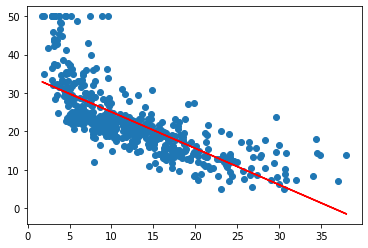

In [56]:
_ = plt.plot(x, y, 'o')
_ = plt.plot(x, m*x+c, 'r')
plt.show()

Now let's assess the accuracy of the model 

In [97]:
# Get residual standard error
RSE = np.sqrt(RSS/(len(x)-2))
RSE

6.215760405398071

In [98]:
xbar = x.mean()
TSSx = np.sum((x - xbar)**2)

# Calculate SE of coefficients
SEB0 = np.sqrt(RSE**2 * ((1/len(x))+(xbar**2/TSSx)))
print("SE for intercept: "+str(SEB0))

SEB1 = np.sqrt(RSE**2 / TSSx)
print("SE for slope: "+str(SEB1))

SE for intercept: 0.5626273549884333
SE for slope: 0.038733416212639434


In [133]:
# Confidence interval
CIB1 = np.array([m - 2 * SEB1, m + 2 * SEB1])
CIB0 = np.array([c - 2 * SEB0, c + 2 * SEB0])

print(CIB1)
print(CIB0)

[-1.02751619 -0.87258252]
[33.42858617 35.67909559]


In [101]:
# R2 
ybar = y.mean()
TSS = np.sum((y - ybar)**2)
R2 = 1 - (RSS / TSS)
R2

0.5441462975864795

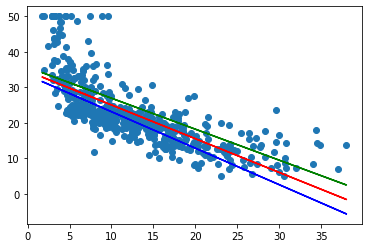

Coefficients:
	 Intercept: 34.55384087938309
	 Slope: -0.9500493537579906

RSE: 6.215760405398071
CI intercept:  [33.42858617 35.67909559]
CI slope:  [-1.02751619 -0.87258252]
R2:  0.5441462975864795


In [143]:
# no idea if this is how CIs work graphically
_ = plt.plot(x, y, 'o')
_ = plt.plot(x, m*x+c, 'r')
_ = plt.plot(x, CIB1[0]*x+CIB0[0], 'b')
_ = plt.plot(x, CIB1[1]*x+CIB0[1], 'g')

plt.show()

print("Coefficients:")
print("\t Intercept: "+str(c))
print("\t Slope: "+str(m))
print("\nRSE: "+str(RSE))
print("CI intercept: ", CIB0)
print("CI slope: ", CIB1)
print("R2: ", R2)

Now I'm going to try scipy's linear regression package.

In [144]:
from scipy import stats

In [145]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [148]:
print("Coefficients:")
print("\t Intercept: ", intercept)
print("\t Slope: ", slope)
print("\nSE for slope: ", std_err)

Coefficients:
	 Intercept:  34.55384087938311
	 Slope:  -0.9500493537579909

SE for slope:  0.038733416212639406


## Multiple regression

In [149]:
y = bos.PRICE
x1 = bos.LSTAT
x2 = bos.AGE

In [153]:
A = np.vstack([x1, x2, np.ones(len(x1))]).T
A

array([[ 4.98, 65.2 ,  1.  ],
       [ 9.14, 78.9 ,  1.  ],
       [ 4.03, 61.1 ,  1.  ],
       ...,
       [ 5.64, 91.  ,  1.  ],
       [ 6.48, 89.3 ,  1.  ],
       [ 7.88, 80.8 ,  1.  ]])

In [151]:
np.linalg.lstsq(A, y, rcond=None)

(array([-1.03206856,  0.03454434, 33.22276053]),
 array([19168.12860876]),
 3,
 array([1694.28048854,  127.3808657 ,    8.44568021]))

In [152]:
b1, b2, c = np.linalg.lstsq(A, y, rcond=None)[0]
RSS = np.linalg.lstsq(A, y, rcond=None)[1][0]

In [155]:
RSE = np.sqrt(RSS / (len(x1)-2-1))
RSE

6.173136281359114

# Excercises

# 8

In [2]:
import numpy as np
import pandas as pd
from scipy import linalg
import sklearn
import matplotlib.pyplot as plt

In [3]:
auto = pd.read_csv('data/Auto.csv', index_col='name', na_values='?')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [4]:
auto = auto.dropna()

In [5]:
x = auto.horsepower
y = auto.mpg

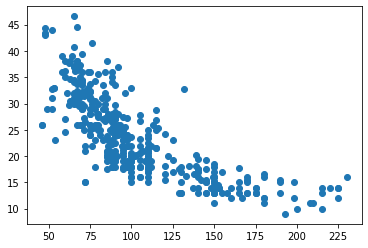

In [6]:
plt.scatter(x, y)

In [7]:
A = np.stack([x, np.ones(len(x))], axis=-1)

In [8]:
np.linalg.lstsq(A, y, rcond=None)

(array([-0.15784473, 39.93586102]),
 array([9385.91587193]),
 2,
 array([2204.05745265,    6.83706171]))

In [9]:
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
RSS = np.linalg.lstsq(A, y, rcond=None)[1][0]

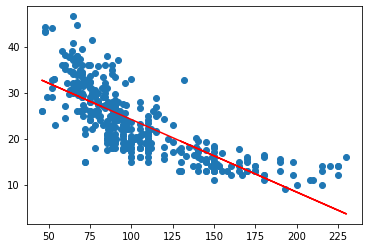

In [10]:
plt.plot(x, y, 'o')
plt.plot(x, m*x+c, 'r')

In [1]:
import statsmodels.api as sm

In [25]:
mod = sm.OLS(y, A)
res = mod.fit()

In [26]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           7.03e-81
Time:                        16:50:59   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1578      0.006    -24.489      0.000      -0.171      -0.145
const         39.9359      0.717     55.660      0.000      38.525      41.347
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 9

array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='cylinders', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='horsepower', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='acceleration', ylabel='mpg'>,
        <AxesSubplot:xlabel='year', ylabel='mpg'>,
        <AxesSubplot:xlabel='origin', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='cylinders'>,
        <AxesSubplot:xlabel='cylinders', ylabel='cylinders'>,
        <AxesSubplot:xlabel='displacement', ylabel='cylinders'>,
        <AxesSubplot:xlabel='horsepower', ylabel='cylinders'>,
        <AxesSubplot:xlabel='weight', ylabel='cylinders'>,
        <AxesSubplot:xlabel='acceleration', ylabel='cylinders'>,
        <AxesSubplot:xlabel='year', ylabel='cylinders'>,
        <AxesSubplot:xlabel='origin', ylabel='cylinders'>],
       [<AxesSubplot:xlabel='mpg', ylabel='displacement'>,
        <AxesSu

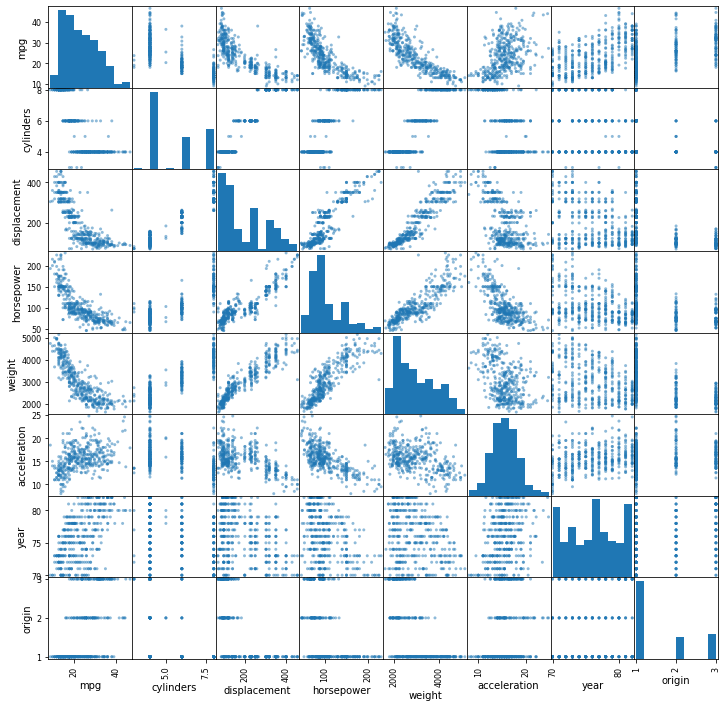

In [31]:
pd.plotting.scatter_matrix(auto, figsize=(12,12))

In [32]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [47]:
y = auto.mpg
x = auto.iloc[:,1:]

In [48]:
x['intercept'] = 1

In [49]:
x.intercept

name
chevrolet chevelle malibu    1
buick skylark 320            1
plymouth satellite           1
amc rebel sst                1
ford torino                  1
                            ..
ford mustang gl              1
vw pickup                    1
dodge rampage                1
ford ranger                  1
chevy s-10                   1
Name: intercept, Length: 392, dtype: int64

In [51]:
mod = sm.OLS(y, x)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          2.04e-139
Time:                        16:58:57   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Let's try doing some interactions.

In [55]:
x2 = auto.loc[:,['cylinders', 'horsepower']]

In [56]:
x2['cyl * horsepower'] = auto['cylinders'] * auto['horsepower']
x2.head()

,cylinders,horsepower,cyl * horsepower
name,,,
chevrolet chevelle malibu,8,130.0,1040.0
buick skylark 320,8,165.0,1320.0
plymouth satellite,8,150.0,1200.0
amc rebel sst,8,150.0,1200.0
ford torino,8,140.0,1120.0


In [57]:
x2['int'] = 1

In [60]:
mod = sm.OLS(y, x2)
res = mod.fit()

In [61]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     344.4
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          5.47e-109
Time:                        21:36:38   Log-Likelihood:                -1106.7
No. Observations:                 392   AIC:                             2221.
Df Residuals:                     388   BIC:                             2237.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cylinders           -6.4925      0.511    -12.716      0.000      -7.496      -5.489
horsepower          -0.4160      0.035    -12.051      0.000      -0.484      -0.348
cyl * horsepower     0.0472      0.005      9.984      0.000       0.038       0.057
int                 72.8151      3.071     23.708      0.000      66.777      78.854
==============================================================================
Omnibus:                       36.976   Durbin-Watson:                   1.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.690
Skew:                           0.583   Prob(JB):                     8.97e-15
Kurtosis:                       4.613   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now let's try the formula thing in statsmodel to see if the result is the same.

In [63]:
import statsmodels.formula.api as smf

In [68]:
# Check to see that it works for horsepower
mod = smf.ols(formula='mpg ~ horsepower', data=auto)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           7.03e-81
Time:                        21:43:12   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
mod = smf.ols(formula='mpg ~ horsepower + cylinders + horsepower:cylinders', data=auto)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     344.4
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          5.47e-109
Time:                        21:46:36   Log-Likelihood:                -1106.7
No. Observations:                 392   AIC:                             2221.
Df Residuals:                     388   BIC:                             2237.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               72.8151      3.071     23.708      0.000      66.777      78.854
horsepower              -0.4160      0.035    -12.051      0.000      -0.484      -0.348
cylinders               -6.4925      0.511    -12.716      0.000      -7.496      -5.489
horsepower:cylinders     0.0472      0.005      9.984      0.000       0.038       0.057
==============================================================================
Omnibus:                       36.976   Durbin-Watson:                   1.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.690
Skew:                           0.583   Prob(JB):                     8.97e-15
Kurtosis:                       4.613   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
# This should be the same thing and it is
mod = smf.ols(formula='mpg ~ horsepower * cylinders', data=auto)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     344.4
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          5.47e-109
Time:                        21:47:27   Log-Likelihood:                -1106.7
No. Observations:                 392   AIC:                             2221.
Df Residuals:                     388   BIC:                             2237.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               72.8151      3.071     23.708      0.000      66.777      78.854
horsepower              -0.4160      0.035    -12.051      0.000      -0.484      -0.348
cylinders               -6.4925      0.511    -12.716      0.000      -7.496      -5.489
horsepower:cylinders     0.0472      0.005      9.984      0.000       0.038       0.057
==============================================================================
Omnibus:                       36.976   Durbin-Watson:                   1.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.690
Skew:                           0.583   Prob(JB):                     8.97e-15
Kurtosis:                       4.613   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Now let's try some nonlinear transformations

In [91]:
# Manually
x3 = auto.loc[:,['horsepower']]
x3['hp2'] = auto.loc[:,'horsepower']**2
x3['int'] = 1
x3.head()

,horsepower,hp2,int
name,,,
chevrolet chevelle malibu,130.0,16900.0,1
buick skylark 320,165.0,27225.0,1
plymouth satellite,150.0,22500.0,1
amc rebel sst,150.0,22500.0,1
ford torino,140.0,19600.0,1


In [92]:
mod = sm.OLS(y, x3)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           5.40e-99
Time:                        22:11:21   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower    -0.4662      0.031    -14.978      0.000      -0.527      -0.405
hp2            0.0012      0.000     10.080      0.000       0.001       0.001
int           56.9001      1.800     31.604      0.000      53.360      60.440
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Neat, let's see if we can do this with the formula thing.

In [99]:
mod = smf.ols(formula='mpg ~ horsepower + np.square(horsepower)', data=auto)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           5.40e-99
Time:                        22:22:27   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                56.9001      1.800     31.604      0.000      53.360      60.440
horsepower               -0.4662      0.031    -14.978      0.000      -0.527      -0.405
np.square(horsepower)     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""